In [1]:
import boto3
from boto3.dynamodb.conditions import Key
from decimal import Decimal
import pandas as pd
import requests

TABLE = "domains"

In [2]:
dynamo = boto3.resource("dynamodb").Table(TABLE)

In [3]:
domains = dynamo.scan(Limit=500, AttributesToGet=['domain_name', 'advertising_spend', 'total_spent', 'category', 'name_servers', 'registrar', 'domain_cost', 'hosting_cost'], Select="SPECIFIC_ATTRIBUTES")
combined_domains = domains['Items']

while True:
    try:
        if domains['LastEvaluatedKey']:
            domains = dynamo.scan(Limit=500, ExclusiveStartKey=domains['LastEvaluatedKey'], AttributesToGet=['domain_name', 'advertising_spend', 'total_spent', 'category', 'name_servers', 'registrar', 'domain_cost', 'hosting_cost'], Select="SPECIFIC_ATTRIBUTES")
            combined_domains += domains['Items']
    except:
        break

In [4]:
print(len(combined_domains))

805


In [5]:
df = pd.DataFrame(data=combined_domains)

#Want to convert array of ns to singular domain for easier comparison
#e.g [ns1.hostblast.net, ns2.hostblast.net] => hostblast.net
df['name_servers'] = df['name_servers'].apply(lambda x: '.'.join(x[0].split('.')[-2:]).lower())
df['registrar'] = df['registrar'].apply(lambda x: x.lower())
df['registrar'] = df['registrar'].apply(lambda x: 'namecheap inc' if x == 'namecheap, inc.' or x == 'namecheap, inc. [tag = namecheap-inc]' else x)
df['name_servers'] = df['name_servers'].apply(lambda x: 'namecheaphosting.com' if x == 'namecheap.com' else x)

In [14]:
#["drugs", "pharmacy", "counterfeits", "money", "COVID-19", "retail", "pets", "Ukraine"]
sample = df.sample(100, random_state=2) 163
sample = pd.merge(new_sample, sample, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [26]:
final_sample =  df.sample(200, random_state=1)

In [230]:
final_sample.iloc[199]

domain_name                keijtankbv.com
name_servers         namecheaphosting.com
domain_cost                            12
total_spent                         16.88
advertising_spend                       0
category                           retail
hosting_cost                         4.88
registrar                   namecheap inc
Name: 285, dtype: object

In [231]:
final_actual = ['money', 'COVID-19', 'pets', 'retail', 'counterfeits', 'drugs', 'money', 'retail', 'money', 'Ukraine', 'pharmacy', 'money', 'pets', 'Ukraine', 'money', 'retail', 'pets', 'money', 'money', 'pets', 'retail', 'money', 'pets', 'pets', 'COVID-19', 'pets', 'pets', 'retail', 'COVID-19', 'pets', 'pets', 'money', 'pets', 'drugs', 'pets', 'money', 'Ukraine', 'money', 'pets', 'pets', 'money', 'money', 'pets', 'drugs', 'money', 'pets', 'retail', 'pets', 'money', 'COVID-19', 'Ukraine', 'retail', 'money', 'money', 'retail', 'money', 'money', 'COVID-19', 'pets', 'money', 'pharmacy', 'money', 'retail', 'money', 'pets', 'money', 'pets', 'money', 'pets', 'money', 'pets', 'counterfeits', 'money', 'money', 'money', 'money', 'money', 'retail', 'pets', 'money', 'retail', 'pets', 'pets', 'pets', 'money', 'pets', 'money', 'pets', 'retail', 'pets', 'money', 'money', 'pets', 'retail', 'pets', 'money', 'COVID-19', 'money', 'money', 'money', 'money', 'money', 'pets', 'pharmacy', 'pets', 'pets', 'money', 'drugs', 'money', 'pets', 'Ukraine', 'pets', 'money', 'money', 'money', 'drugs', 'counterfeits', 'Ukraine', 'retail', 'money', 'money', 'retail', 'money', 'pharmacy', 'money', 'money', 'money', 'money', 'Ukraine', 'money', 'money', 'money', 'retail', 'retail', 'pets', 'counterfeits', 'pets', 'money', 'money', 'money', 'pets', 'drugs', 'drugs', 'money', 'retail', 'money', 'pets', 'money', 'money', 'retail', 'pets', 'Ukraine', 'pets', 'retail', 'money', 'money', 'Ukraine', 'Ukraine', 'pets', 'pets', 'money', 'pets', 'money', 'retail', 'retail', 'pharmacy', 'money', 'pets', 'pharmacy', 'money', 'retail', 'money', 'money', 'money', 'pets', 'money', 'money', 'retail', 'pets', 'retail', 'money', 'pets', 'money', 'money', 'pets', 'money', 'pets', 'money', 'retail', 'pets', 'drugs', 'money', 'money', 'COVID-19', 'money', 'money', 'money', 'money', 'pets', 'money']

In [232]:
final_sample['actual'] = final_actual

In [233]:
from sklearn import metrics

print(metrics.classification_report(final_sample['actual'], final_sample['category'], digits=3))

              precision    recall  f1-score   support

    COVID-19      0.429     0.857     0.571         7
     Ukraine      0.667     0.800     0.727        10
counterfeits      0.250     0.500     0.333         4
       drugs      1.000     0.250     0.400         8
       money      0.800     0.791     0.795        86
        pets      0.863     0.830     0.846        53
    pharmacy      0.600     0.500     0.545         6
      retail      0.565     0.500     0.531        26

    accuracy                          0.730       200
   macro avg      0.647     0.629     0.594       200
weighted avg      0.757     0.730     0.731       200



In [237]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(f"f1: {f1_score(final_sample['actual'], final_sample['category'], average='micro')}")
print(f"precision: {precision_score(final_sample['actual'], final_sample['category'], average='micro')}")
print(f"recall: {recall_score(final_sample['actual'], final_sample['category'], average='micro')}")

f1: 0.7299999999999999
precision: 0.73
recall: 0.73


In [15]:
sample.iloc[99]['domain_name']

'samosasarl.com'

In [10]:
actual = ['pets', 'retail', 'money', 'retail', 'retail', 'retail', 'retail', 'money', 'retail', 'drugs', 'pets', 'money', 'money', 'counterfeits', 'pharmacy', 'money', 'pharmacy', 'money', 'money', 'money', 'Ukraine', 'money', 'pets', 'money', 'retail', 'money', 'pets', 'pets', 'money', 'Ukraine', 'money', 'money', 'pets', 'money', 'drugs', 'retail', 'pets', 'money', 'pharmacy', 'pets', 'money', 'money', 'retail', 'Ukraine', 'money', 'pets', 'money', 'pets', 'money', 'money', 'counterfeits', 'retail', 'money', 'pets', 'Ukraine', 'pets', 'money', 'money', 'pets', 'money', 'pets', 'money', 'counterfeits', 'pets', 'pets', 'drugs', 'retail', 'COVID-19', 'money', 'money', 'retail', 'Ukraine', 'pets', 'money', 'money', 'pets', 'drugs', 'money', 'money', 'money', 'pharmacy', 'money', 'money', 'money', 'money', 'pets', 'money', 'retail', 'pets', 'pets', 'retail', 'money', 'money', 'money', 'money', 'pets', 'retail', 'pets', 'money', 'retail']

In [138]:
backup = sample

In [11]:
sample['actual'] = actual
sample[sample['actual'] != sample['category']].count()

domain_name          72
name_servers         72
domain_cost          72
total_spent          72
advertising_spend    72
category             72
hosting_cost         72
registrar            72
actual               72
dtype: int64

In [23]:
new_sample = df.sample(112, random_state=1)
test = pd.merge(new_sample, sample, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [24]:
new_actual = ['money', 'money', 'retail', 'counterfeits', 'money', 'retail', 'money', 'money', 'money', 'money', 'pets', 'Ukraine', 'money', 'retail', 'pets', 'money', 'money', 'pets', 'pets', 'money', 'pets', 'pharmacy', 'pets', 'retail', 'COVID-19', 'pets', 'money', 'pets', 'drugs', 'pets', 'money', 'Ukraine', 'money', 'pets', 'pets', 'money', 'money', 'pets', 'drugs', 'money', 'retail', 'pets', 'money', 'money', 'money', 'money', 'retail', 'money', 'money', 'COVID-19', 'pets', 'retail', 'money', 'retail', 'money', 'pets', 'pets', 'money', 'pets', 'money', 'pets', 'money', 'money', 'money', 'money', 'money', 'money', 'retail', 'pets', 'money', 'pharmacy', 'pets', 'pets', 'pets', 'money', 'pets', 'money', 'pets', 'retail', 'pets', 'money', 'money', 'pets', 'money', 'pets', 'money', 'money', 'money', 'money', 'money', 'money', 'money', 'pets', 'pets', 'pets', 'money', 'drugs', 'money', 'Ukraine', 'pets']

In [25]:
test['actual'] = new_actual
test[test['actual'] != test['category']].count()

ValueError: Length of values does not match length of index

In [145]:
(100-26)/100

0.74

In [291]:
big = test.append(sample)

In [311]:
big[big['actual'] == 'money'].count()

domain_name          92
name_servers         92
domain_cost          92
total_spent          92
advertising_spend    92
category             92
hosting_cost         92
registrar            92
actual               92
dtype: int64

In [296]:
confusion_matrix = pd.crosstab(big['actual'], big['category'], rownames=['Actual'], colnames=['Precicted'])

In [301]:
confusion_matrix

Precicted,COVID-19,Ukraine,counterfeits,drugs,money,pets,pharmacy,retail
Actual,,,,,,,,
COVID-19,3,0,0,0,0,0,0,0
Ukraine,2,4,0,0,2,0,0,0
counterfeits,0,0,4,0,0,0,0,0
drugs,0,0,1,3,3,0,0,0
money,7,4,0,0,71,3,1,6
pets,3,1,1,0,2,45,1,1
pharmacy,0,1,1,0,3,0,0,1
retail,1,0,5,0,6,2,1,11


In [312]:
#predicted
print(confusion_matrix['money'].sum())

#actual
print(confusion_matrix.loc['money'].sum())

#predicted correct
print(confusion_matrix.loc['money']['money'])

87
92
71


In [313]:
cats = ["drugs", "pharmacy", "counterfeits", "money", "COVID-19", "retail", "pets", "Ukraine"]
precision = {}

for cat in cats:
    pred_corr = confusion_matrix.loc[cat][cat]
    pred_tot = confusion_matrix[cat].sum()
    precision[cat] = pred_corr / pred_tot
    
print(precision)

{'drugs': 1.0, 'pharmacy': 0.0, 'counterfeits': 0.3333333333333333, 'money': 0.8160919540229885, 'COVID-19': 0.1875, 'retail': 0.5789473684210527, 'pets': 0.9, 'Ukraine': 0.4}


In [314]:
recall = {}

for cat in cats:
    pred_corr = confusion_matrix.loc[cat][cat]
    pred_actual = confusion_matrix.loc[cat].sum()
    recall[cat] = pred_corr / pred_actual
    
print(recall)

{'drugs': 0.42857142857142855, 'pharmacy': 0.0, 'counterfeits': 1.0, 'money': 0.7717391304347826, 'COVID-19': 1.0, 'retail': 0.4230769230769231, 'pets': 0.8333333333333334, 'Ukraine': 0.5}


In [315]:
from sklearn import metrics

print(metrics.classification_report(big['actual'], big['category'], digits=3))

              precision    recall  f1-score   support

    COVID-19      0.188     1.000     0.316         3
     Ukraine      0.400     0.500     0.444         8
counterfeits      0.333     1.000     0.500         4
       drugs      1.000     0.429     0.600         7
       money      0.816     0.772     0.793        92
        pets      0.900     0.833     0.865        54
    pharmacy      0.000     0.000     0.000         6
      retail      0.579     0.423     0.489        26

    accuracy                          0.705       200
   macro avg      0.527     0.620     0.501       200
weighted avg      0.754     0.705     0.716       200



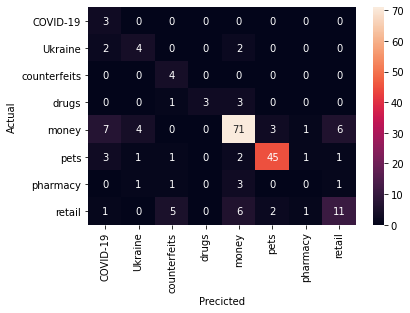

In [298]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [57]:
df.groupby(['category']).size().reset_index(name='counts').sort_values('counts', ascending=False)

,category,counts
4,money,373
5,pets,158
7,retail,91
0,COVID-19,61
2,counterfeits,47
1,Ukraine,43
6,pharmacy,22
3,drugs,10


In [71]:
df[(df['category']=='pets') & (df['advertising_spend'] == 0)].count()

domain_name          144
name_servers         144
domain_cost          144
total_spent          144
advertising_spend    144
category             144
hosting_cost         144
registrar            144
dtype: int64

In [75]:
df[(df['category']=='pets')].groupby('name_servers').size().reset_index(name='counts').sort_values('counts', ascending=False)

,name_servers,counts
25,namecheaphosting.com,48
38,ukit.com,10
5,cloudflare.com,10
8,dns-parking.com,9
45,wixdns.net,8
40,webfundament.com,6
9,domaincontrol.com,6
30,registrar-servers.com,5
41,webhostbox.net,4
1,blogvisa.com,4


In [72]:
df[(df['category']=='pets') & (df['hosting_cost'] == 0)].sort_values('total_spent').head(20)

,domain_name,name_servers,domain_cost,total_spent,advertising_spend,category,hosting_cost,registrar
460,soleckischnauzers.net,wixdns.net,11,11,0,pets,0,namecheap inc
1,joyfulchukchas.com,cloudflare.com,12,12,0,pets,0,namecheap inc
525,royalsiteyorkshireterrierpuppies.com,webhostbox.net,12,12,0,pets,0,pdr ltd. d/b/a publicdomainregistry.com
513,donaldpugpuppieshome.com,registrar-servers.com,12,12,0,pets,0,namecheap inc
504,poshbasset.com,wixdns.net,12,12,0,pets,0,google llc
503,cutebernesepuppies.com,emaila.pk,12,12,0,pets,0,"namesilo, llc"
488,classicdogopuppies.com,ukit.com,12,12,0,pets,0,dreamhost
469,classicpetspot.com,stackdns.com,12,12,0,pets,0,namecheap inc
463,justbulldogpuppies.com,wixdns.net,12,12,0,pets,0,wix.com ltd.
442,terramoollars.com,hostnownow.com,12,12,0,pets,0,"ownregistrar, inc."


In [27]:
df['total_spent'].median()

12.0

In [20]:
categories = ["drugs", "pharmacy", "counterfeits", "money", "COVID-19", "retail", "pets", "Ukraine"]

categories_median_spend = {}

for category in categories:
    categories_median_spend[category] = df[df['category'] == category]['total_spent'].median()

In [23]:
median_df = pd.DataFrame(data=categories_median_spend.items(), columns=['Category', 'Median Total Spent']).sort_values('Median Total Spent', ascending=False)
median_df

,Category,Median Total Spent
5,retail,16.88
4,COVID-19,14.75
6,pets,13.36
2,counterfeits,13.00
7,Ukraine,13.00
0,drugs,12.00
1,pharmacy,12.00
3,money,12.00


In [95]:
counts = df.groupby(['registrar']).size().reset_index(name='counts').sort_values('counts', ascending=False)
counts['percent'] = (counts['counts'] / len(combined_domains)) * 100

In [96]:
counts.head(10)

,registrar,counts,percent
37,namecheap inc,251,31.180124
45,"ownregistrar, inc.",91,11.304348
38,"namesilo, llc",71,8.819876
46,pdr ltd. d/b/a publicdomainregistry.com,45,5.590062
22,"godaddy.com, llc",37,4.596273
27,hosting concepts b.v. d/b/a registrar.eu,34,4.223602
31,internet domain service bs corp.,25,3.105590
17,"enom, inc.",22,2.732919
51,registrar of domain names reg.ru llc,20,2.484472
40,"netearth one, inc.",19,2.360248


In [18]:
host_counts = df.groupby(['name_servers']).size().reset_index(name='counts').sort_values('counts', ascending=False)
host_counts['percent'] = (host_counts['counts'] / len(combined_domains)) * 100

In [20]:
host_counts.count()

name_servers    130
counts          130
percent         130
dtype: int64

In [98]:
host_counts.head(10)

,name_servers,counts,percent
75,namecheaphosting.com,114,14.161491
55,hostnownow.com,107,13.291925
21,cloudflare.com,43,5.341615
10,asurahosting.com,37,4.596273
46,gocheapweb.com,31,3.850932
30,dns-parking.com,30,3.726708
57,hostsailor.com,25,3.105590
85,owlhost.net,24,2.981366
34,domaincontrol.com,20,2.484472
128,wixdns.net,18,2.236025


In [99]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(host_counts)

                     name_servers  counts    percent
75           namecheaphosting.com     114  14.161491
55                 hostnownow.com     107  13.291925
21                 cloudflare.com      43   5.341615
10               asurahosting.com      37   4.596273
46                 gocheapweb.com      31   3.850932
30                dns-parking.com      30   3.726708
57                 hostsailor.com      25   3.105590
85                    owlhost.net      24   2.981366
34              domaincontrol.com      20   2.484472
128                    wixdns.net      18   2.236025
44              globexcamhost.com      17   2.111801
90                 prohoster.name      17   2.111801
15                   blogvisa.com      15   1.863354
20             ccntechnologies.us      13   1.614907
116                      ukit.com      13   1.614907
97          registrar-servers.com      11   1.366460
36                      edns1.com      10   1.242236
4                abuse-alert.host      10   1.

In [23]:
from tqdm.notebook import tqdm
import ssl

In [165]:
combined_domains[0]

{'domain_name': 'creditoneequity.com',
 'name_servers': ['NS1.RO.HOSTSAILOR.COM', 'NS2.RO.HOSTSAILOR.COM'],
 'total_spent': Decimal('24'),
 'advertising_spend': Decimal('0'),
 'category': 'money',
 'registrar': 'ENOM, INC.'}

In [213]:
kms_domains = ['sandominingcompany.com', 'kiistore.com', 'statespitbullhomes.com', 'validatesyncwalletorg.com', 'mellowminiatureschnauzerpuppies.com', 'eurotelebanco.com', 'wesupportukrain.fund', 'allstarberners.com', 'cinnamonplc.org', 'citizenbenk.com', 'lovelycanecorsoforsale.com', 'fastlinecargos.com', 'espo-oilpipeline.com', 'aseelfinanceincorp.com', 'smartgunshop.com', 'tradeworldptyltd.com', 'escalonspugpuppies.com', 'agricanoagrocoltd.com',  'marketsurveys.us', 'care-international-au.org', 'nmui-dws.us', 'dcimportss.com', 'kathleenchowchowpuppies.com', 'lafumarket.com', 'mathoera-logistics.com', 'swisstrustfinco.com', 'highwavetravels.com', 'euroscraps.com', 'premierssd.com', 'abigailgreatdanepups.com', 'ziontrust.online', 'convexmerchants.com', 'login-accountsblockchain.com', 'cimb-my.com']

In [29]:
import certifi

try:
    res = requests.get(f'https://tradeworldptyltd.com', timeout=60)
#         res = requests.get(f'https://expired.badssl.com/', timeout=20)
    print(res)
except requests.exceptions.SSLError as e:
    print(f"lovelycanecorsoforsale.com, error: {e}")
    str_e = ' '.join(str(e).split(' ')[-4:-1])
    print(str_e)
except Exception as e:
    print('oh no')

lovelycanecorsoforsale.com, error: HTTPSConnectionPool(host='tradeworldptyltd.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1123)')))
alert internal error


In [214]:
failed = {}
for domain in kms_domains:
# for i in range(1):
    try:
        res = requests.get(f'https://{domain}', timeout=20)
#         res = requests.get(f'https://expired.badssl.com/', timeout=20)
    except requests.exceptions.SSLError as e:
        print(f"{domain}, error: {e}")
        str_e = ' '.join(str(e).split(' ')[-4:-1])
        print(str_e)
        if str_e in failed:
            failed[str_e] += 1
        else:
            failed[str_e] = 1
    except Exception as e:
        print('oh no')

sandominingcompany.com, error: HTTPSConnectionPool(host='sandominingcompany.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1123)')))
self signed certificate
kiistore.com, error: HTTPSConnectionPool(host='kiistore.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError("hostname 'kiistore.com' doesn't match either of 'ssl-not-enabled.com', 'www.ssl-not-enabled.com'")))
either of 'ssl-not-enabled.com',
statespitbullhomes.com, error: HTTPSConnectionPool(host='statespitbullhomes.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1123)')))
certificate has expired
mellowminiatureschnauzerpuppies.com, error: HTTPSConnectionPool(host='mellowminiatureschnauzerpuppies.com', port

In [208]:
old = failed

In [215]:
failed_df = pd.DataFrame(data=failed.items(), columns=['Error', 'Count'])
failed_df = failed_df[~failed_df.Error.str.contains('either')]

failed_df = failed_df.sort_values('Count', ascending=False)
failed_df

,Error,Count
2,certificate has expired,5
0,self signed certificate,4
5,local issuer certificate,1
6,alert internal error,1


In [7]:
import ssl, socket

In [9]:
combined_domains[0]

{'domain_name': 'creditoneequity.com',
 'name_servers': ['NS1.RO.HOSTSAILOR.COM', 'NS2.RO.HOSTSAILOR.COM'],
 'total_spent': Decimal('24'),
 'advertising_spend': Decimal('0'),
 'category': 'money',
 'registrar': 'ENOM, INC.'}

In [15]:
issuers = {}

ctx = ssl.create_default_context()

for domain in tqdm(combined_domains):
    hostname = domain['domain_name']

    with ctx.wrap_socket(socket.socket(), server_hostname=hostname) as s:
        try:
            s.connect((hostname, 443))
            cert = s.getpeercert()
        except Exception as e:
            print(e)
            continue

    issuer = dict(x[0] for x in cert['issuer'])['commonName']
    
    if issuer in issuers:
        issuers[issuer] += 1
    else:
        issuers[issuer] = 1

[Errno -2] Name or service not known
[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1123)
[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'kiistore.com'. (_ssl.c:1123)
[Errno -3] Temporary failure in name resolution
[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1123)
[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'cutebluedeyedhuskyhomes.com'. (_ssl.c:1123)
[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'mellowminiatureschnauzerpuppies.com'. (_ssl.c:1123)
[Errno -2] Name or service not known
[Errno 111] Connection refused
[Errno -2] Name or service not known
[Errno -2] Name or service not known
[Errno -3] Temporary failure in name resolution
[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch

In [17]:
issuers_df = pd.DataFrame(data=issuers.items(), columns=['Issuer', 'Count'])

issuers_df = issuers_df.sort_values('Count', ascending=False)
issuers_df

,Issuer,Count
0,R3,458
2,Sectigo RSA Domain Validation Secure Server CA,130
3,"cPanel, Inc. Certification Authority",102
1,Cloudflare Inc ECC CA-3,29
4,E1,15
6,ZeroSSL RSA Domain Secure Site CA,4
7,Encryption Everywhere DV TLS CA - G1,3
8,GTS CA 1D4,2
10,Go Daddy Secure Certificate Authority - G2,2
5,GlobalSign Domain Validation CA - SHA256 - G3,1


In [21]:
issuers_df.sum()

Issuer    R3Sectigo RSA Domain Validation Secure Server ...
Count                                                   748
dtype: object